In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Importing dataset from the CSV to Python Jupyter note book

df = pd.read_csv("C:\\Eswar\\My Projects\\Python Project\\ai_adoption_dataset.csv")
df.head()

,country,industry,ai_tool,adoption_rate,daily_active_users,year,age_group,company_size
0,USA,Technology,ChatGPT,40.45,2461,2023,35-44,Startup
1,France,Manufacturing,Midjourney,35.72,8496,2024,18-24,Enterprise
2,Australia,Transportation,ChatGPT,13.47,8641,2024,45-54,Startup
3,UK,Manufacturing,ChatGPT,48.46,3488,2023,45-54,Enterprise
4,UK,Agriculture,Stable Diffusion,34.06,1124,2024,45-54,SME


In [4]:
df.shape

(145000, 8)

In [14]:
# by using this we can get the information about the columns data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145000 entries, 0 to 144999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   country             145000 non-null  object 
 1   industry            145000 non-null  object 
 2   ai_tool             145000 non-null  object 
 3   adoption_rate       145000 non-null  float64
 4   daily_active_users  145000 non-null  int64  
 5   year                145000 non-null  int64  
 6   age_group           145000 non-null  object 
 7   company_size        145000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 8.9+ MB


In [15]:
# by using this we can get the null values in the dataset
df.isnull().sum()

country               0
industry              0
ai_tool               0
adoption_rate         0
daily_active_users    0
year                  0
age_group             0
company_size          0
dtype: int64

In [16]:
# by using this we can get the duplicated values in dataset
df.duplicated().sum()

0

In [17]:
# by using this we can get all the column names
df.columns

Index(['country', 'industry', 'ai_tool', 'adoption_rate', 'daily_active_users',
       'year', 'age_group', 'company_size'],
      dtype='object')

In [18]:
# by using this we can get the numeric columns mean, std, min, max etc.
df.describe()

,adoption_rate,daily_active_users,year
count,145000.000000,145000.000000,145000.000000
mean,49.873025,5039.302683,2023.703117
std,28.842523,2858.124918,0.456886
min,0.000000,100.000000,2023.000000
25%,24.930000,2566.000000,2023.000000
50%,49.760000,5036.000000,2024.000000
75%,74.840000,7515.000000,2024.000000
max,100.000000,9999.000000,2024.000000


### 1.How many total records are in the dataset?

In [25]:
Total_records = df.shape[0]
print('Total Records in the dataset is : ',Total_records)

Total Records in the dataset is :  145000


### 2.What is the average adoption rate of AI tools globally?

In [253]:
Avg_adoption_rate = df['adoption_rate'].mean()
print('The average adoption rate of AI tools globally: ', round(Avg_adoption_rate, 2), '%')

The average adoption rate of AI tools globally:  49.87 %


### 3.Which AI tool has the highest average daily active users?

In [28]:
df.groupby('ai_tool')['daily_active_users'].mean().sort_values(ascending = False)

ai_tool
Claude              5063.640132
Bard                5061.178387
Midjourney          5040.556204
Stable Diffusion    5038.876523
ChatGPT             5030.000551
Name: daily_active_users, dtype: float64

In [32]:
AI_tool_higest_max = df.groupby('ai_tool')['daily_active_users'].mean().sort_values(ascending = False).max()
AI_tool_higest_max

5063.640131759539

In [33]:
AI_too_higest_name = df.groupby('ai_tool')['daily_active_users'].mean().sort_values(ascending = False).idxmax()
AI_too_higest_name

'Claude'

In [36]:
print('AI tool has the highest average daily active users: ', AI_too_higest_name, round(AI_tool_higest_max,2), 'Users')

AI tool has the highest average daily active users:  Claude 5063.64 Users


## 3Q - Visual

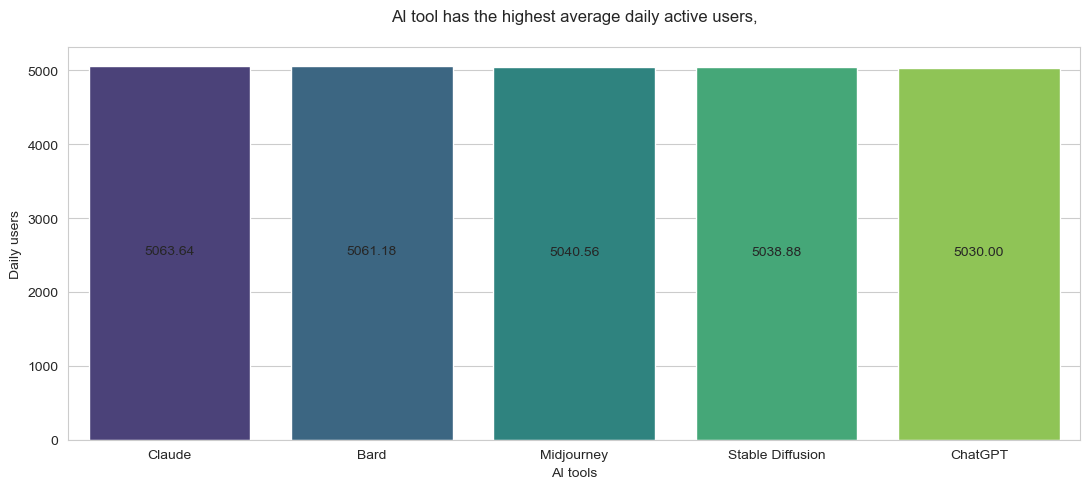

In [256]:
avg_adpt = df.groupby('ai_tool')['daily_active_users'].mean().sort_values(ascending = False)
avg_adp = pd.DataFrame(avg_adpt)

plt.figure(figsize = (11,5))
a = sb.barplot(data = avg_adp, x = 'ai_tool', y = 'daily_active_users', hue = 'ai_tool', palette = 'viridis')

for values in a.containers:
    a.bar_label(values, fmt='%.2f', label_type = 'center', padding = 1)

plt.title('AI tool has the highest average daily active users,\n')
plt.xlabel('AI tools')
plt.ylabel('Daily users')
plt.xticks(rotation=0)
plt.tight_layout()

# Saving this visual plot before showing it
# plt.savefig("avg_daily_users.png", dpi=300, bbox_inches='tight')

plt.show()




### 4.Which country uses each AI tool the most?

In [5]:
grouped = df.groupby(['country', 'ai_tool'])['daily_active_users'].sum().reset_index()
grouped

,country,ai_tool,daily_active_users
0,Australia,Bard,7574699
1,Australia,ChatGPT,30048451
2,Australia,Claude,3640177
3,Australia,Midjourney,21809175
4,Australia,Stable Diffusion,10911740
5,Brazil,Bard,7132916
6,Brazil,ChatGPT,28093206
7,Brazil,Claude,3678347
8,Brazil,Midjourney,22094798
9,Brazil,Stable Diffusion,11007954


In [6]:
group = grouped.loc[grouped.groupby('country')['daily_active_users'].idxmax()]
print('     country uses each AI tool the most', '\n')
group

     country uses each AI tool the most 



,country,ai_tool,daily_active_users
1,Australia,ChatGPT,30048451
6,Brazil,ChatGPT,28093206
11,Canada,ChatGPT,28867367
16,China,ChatGPT,29505271
21,France,ChatGPT,29658373
26,Germany,ChatGPT,29200142
31,India,ChatGPT,29384243
36,South Korea,ChatGPT,29313965
41,UK,ChatGPT,28889642
46,USA,ChatGPT,29005722


## 4Q - Visual

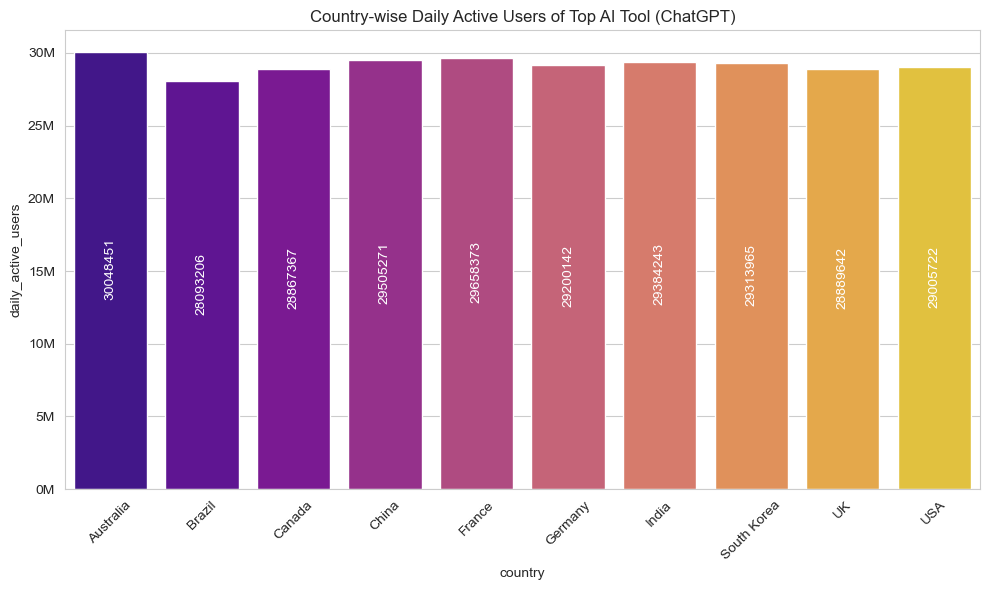

In [258]:
import matplotlib.ticker as mtick
gr = pd.DataFrame(group)

plt.figure(figsize = (10, 6))
b = sb.barplot(data = gr, x = 'country', y = 'daily_active_users', hue = 'country', palette = 'plasma')

b.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M'))

for values in b.containers:
    b.bar_label(values, fmt='%d', label_type = 'center', rotation = 90, color = 'white', padding=1)
    
plt.title('Country-wise Daily Active Users of Top AI Tool (ChatGPT)')
plt.xticks(rotation=45)
plt.tight_layout()

# Saving this visual plot before showing it
# plt.savefig("Q4", dpi=300, bbox_inches='tight')

plt.show()



In [387]:
gr.dtypes

country               object
ai_tool               object
daily_active_users     int64
dtype: object

### 5.Which country has the highest average AI tool adoption rate?

In [9]:
country = df.groupby('country')['adoption_rate'].mean().round(2).sort_values(ascending = False).head(1)
country

country
Germany    50.18
Name: adoption_rate, dtype: float64

In [10]:
AI_adoption_rate_value = country.max()
AI_adoption_rate_value

50.18

In [11]:
AI_adoption_rate_country = country.idxmax()
AI_adoption_rate_country

'Germany'

In [12]:
print('country has the highest average AI tool adoption rate: ', AI_adoption_rate_country, round(AI_adoption_rate_value, 2))

country has the highest average AI tool adoption rate:  Germany 50.18


## Q5 - Visual

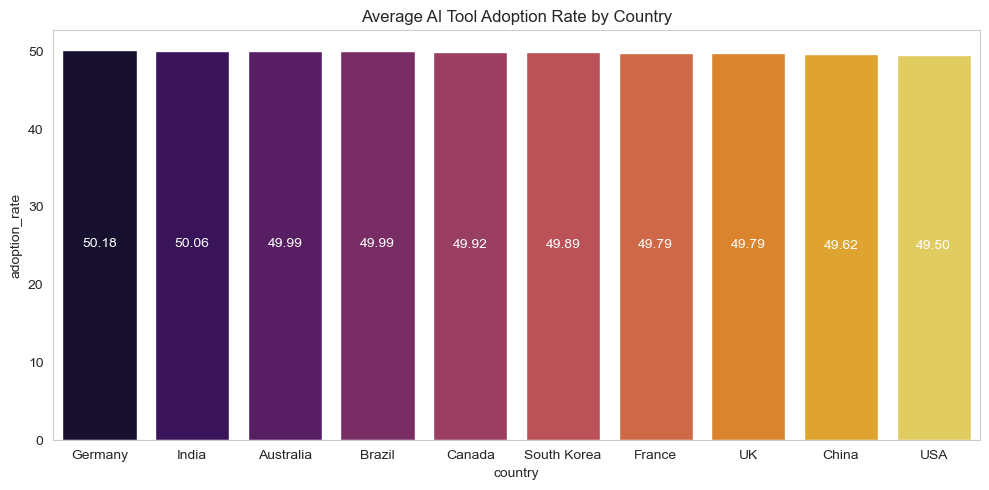

In [260]:
co = df.groupby('country')['adoption_rate'].mean().round(2).sort_values(ascending = False)
c = pd.DataFrame(co)

plt.figure(figsize = (10, 5))
d = sb.barplot(data = c, x = 'country', y = 'adoption_rate', hue = 'country', palette = 'inferno' )

for value in d.containers:
    d.bar_label(value, fmt= '%.2f', label_type = 'center', color = 'white', padding = 1)

plt.title('Average AI Tool Adoption Rate by Country')
plt.xticks(rotation=0)
plt.tight_layout()

# Saving this visual plot before showing it
# plt.grid(False)
# plt.savefig("Q5", dpi=300, bbox_inches='tight')

plt.show()

### 6.Which industry shows the highest AI adoption rate?

In [16]:
industry = df.groupby('industry')['adoption_rate'].mean().sort_values(ascending = False)
industry

industry
Agriculture       50.329049
Technology        50.017133
Finance           49.960481
Healthcare        49.868791
Transportation    49.842929
Education         49.788982
Retail            49.607140
Manufacturing     49.575804
Name: adoption_rate, dtype: float64

In [17]:
AI_adoption_rate_value = industry.max()
AI_adoption_rate_value

50.32904937033322

In [18]:
AI_adoption_rate_industry = industry.idxmax()
AI_adoption_rate_industry

'Agriculture'

In [19]:
print('industry shows the highest AI adoption rate: ', AI_adoption_rate_industry, round(AI_adoption_rate_value, 2))

industry shows the highest AI adoption rate:  Agriculture 50.33


## Q6 - Visual

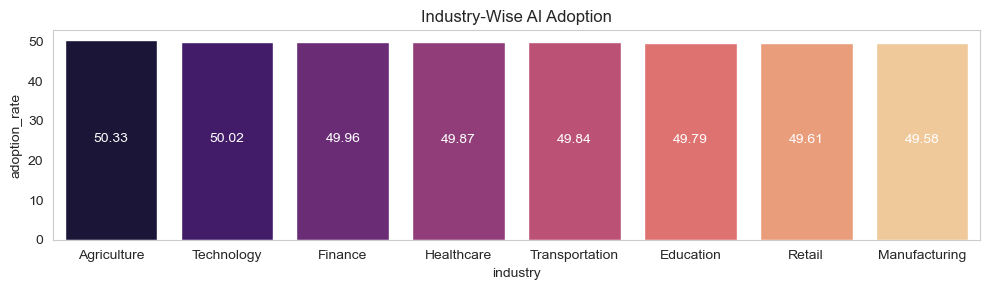

In [261]:
indus = df.groupby('industry')['adoption_rate'].mean().sort_values(ascending = False)
indu = pd.DataFrame(indus)

plt.figure(figsize = (10, 3))
e = sb.barplot(data = indu, x = 'industry', y = 'adoption_rate', hue = 'industry', palette = 'magma' )

for values in e.containers:
    e.bar_label(values, fmt = '%.2f', label_type = 'center', color = 'white', padding = 1 )

plt.title('Industry-Wise AI Adoption')
plt.xticks(rotation = 0)
plt.tight_layout()


# Saving this visual plot before showing it
# plt.grid(False)
# plt.savefig("Q6", dpi=300, bbox_inches='tight')

plt.show()


### 7.What is the most used AI tool in each industry?

In [26]:
industries = df.groupby(['industry', 'ai_tool'])['daily_active_users'].mean().reset_index()
industries

,industry,ai_tool,daily_active_users
0,Agriculture,Bard,5094.004018
1,Agriculture,ChatGPT,5018.077819
2,Agriculture,Claude,5024.404788
3,Agriculture,Midjourney,5090.071709
4,Agriculture,Stable Diffusion,5020.499817
5,Education,Bard,5031.063441
6,Education,ChatGPT,5008.106818
7,Education,Claude,5005.439870
8,Education,Midjourney,5052.429604
9,Education,Stable Diffusion,5042.363145


In [27]:
result_industries = industries.loc[industries.groupby('industry')['daily_active_users'].idxmax()]
print('       the most used AI tool in each industry', '\n')
result_industries

       the most used AI tool in each industry 



,industry,ai_tool,daily_active_users
0,Agriculture,Bard,5094.004018
8,Education,Midjourney,5052.429604
12,Finance,Claude,5241.353383
15,Healthcare,Bard,5123.300167
24,Manufacturing,Stable Diffusion,5142.568351
28,Retail,Midjourney,5081.292747
33,Technology,Midjourney,5091.055346
35,Transportation,Bard,5114.198073


## Q7 - Visual

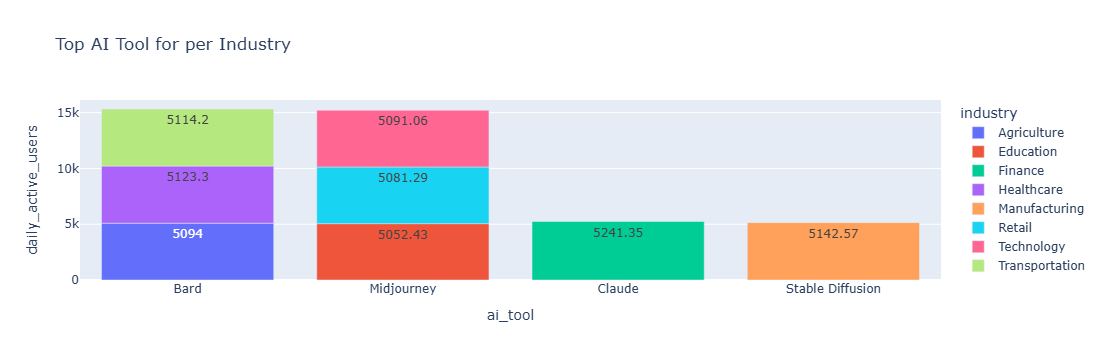

In [263]:
import plotly.express as px

result_industries = industries.loc[industries.groupby('industry')['daily_active_users'].idxmax()]
indust = pd.DataFrame(result_industries)


#fig = px.bar(indust, x = 'industry', y = 'daily_active_users', color = 'ai_tool', title= 'Top Daily Active Users per Industry', \
 #     text=indust['daily_active_users'].round(2))

fig = px.bar(indust, x = 'ai_tool', y = 'daily_active_users', color = 'industry', title= 'Top AI Tool for per Industry', \
            text=indust['daily_active_users'].round(2))

fig.update_traces(textposition='inside')

fig.show()

In [55]:
indust.dtypes

industry               object
ai_tool                object
daily_active_users    float64
dtype: object

### 8.How has AI tool adoption changed from 2023 to 2024?

In [121]:
# Change in Average Adoption Rate (2023 → 2024)

In [122]:
# Compute average adoption rate per year
avg_adoption = df.groupby('year')['adoption_rate'].mean().reset_index()
avg_adoption

,year,adoption_rate
0,2023,50.022059
1,2024,49.810097


In [123]:
avg_adoption_rate= (avg_adoption[avg_adoption['year']== 2024]['adoption_rate'].values[0] + avg_adoption[avg_adoption['year']== 2023]['adoption_rate'].values[0])/2

print('average adoption rate per year: ', round(avg_adoption_rate, 2),'%')

average adoption rate per year:  49.92 %


In [124]:
# Change in Total Daily Active Users (2023 → 2024)

In [125]:
# Sum of daily active users per year
total_users = df.groupby('year')['daily_active_users'].sum().reset_index()


In [126]:
# Percentage change
percentage = ((total_users[total_users['year']==2024]['daily_active_users'].values[0] - total_users[total_users['year']==2023]['daily_active_users'].values[0]) 
              / total_users[total_users['year']==2023]['daily_active_users'].values[0]) * 100
print('Daily active users change from 2023 to 2024 in percentage is : ', round(percentage, 2), '%')

Daily active users change from 2023 to 2024 in percentage is :  137.13 %


In [ ]:
# Change in industry (2023 → 2024)

In [63]:
# Average adoption rate by industry and year
adoption = df.groupby(['industry', 'year'])['adoption_rate'].mean().unstack()
adoption

year,2023,2024
industry,,
Agriculture,50.114323,50.418922
Education,50.306766,49.575569
Finance,50.552325,49.708576
Healthcare,49.780652,49.905919
Manufacturing,49.499985,49.607291
Retail,50.167180,49.364894
Technology,49.700792,50.149554
Transportation,50.049805,49.753087


In [64]:
diffirence = adoption[2023] - adoption[2024]
print('Average adoption rate by industry and year : \n\n',diffirence.sort_values(ascending = False) )

Average adoption rate by industry and year : 

 industry
Finance           0.843749
Retail            0.802287
Education         0.731197
Transportation    0.296718
Manufacturing    -0.107306
Healthcare       -0.125268
Agriculture      -0.304599
Technology       -0.448762
dtype: float64


In [65]:
adoption['diffirence'] = diffirence
adoption.sort_values('diffirence', ascending = False)

year,2023,2024,diffirence
industry,,,
Finance,50.552325,49.708576,0.843749
Retail,50.167180,49.364894,0.802287
Education,50.306766,49.575569,0.731197
Transportation,50.049805,49.753087,0.296718
Manufacturing,49.499985,49.607291,-0.107306
Healthcare,49.780652,49.905919,-0.125268
Agriculture,50.114323,50.418922,-0.304599
Technology,49.700792,50.149554,-0.448762


In [66]:
# Change in ai_tool (2023 → 2024)

In [80]:
# Average adoption rate by ai_tool and year
ai = df.groupby(['ai_tool', 'year'])['adoption_rate'].mean().unstack()
ai

year,2023,2024
ai_tool,,
Bard,49.807776,49.815614
ChatGPT,49.997590,49.872258
Claude,50.035480,50.262959
Midjourney,50.219806,49.760481
Stable Diffusion,49.832386,49.588063


In [68]:
differ = ai[2023] - ai[2024]
print('Average adoption rate by ai_tool and year : \n\n',differ.sort_values(ascending = False) )

Average adoption rate by ai_tool and year : 

 ai_tool
Midjourney          0.459325
Stable Diffusion    0.244324
ChatGPT             0.125332
Bard               -0.007838
Claude             -0.227480
dtype: float64


In [69]:
ai['differ'] = differ
ai.sort_values('differ', ascending = False)

year,2023,2024,differ
ai_tool,,,
Midjourney,50.219806,49.760481,0.459325
Stable Diffusion,49.832386,49.588063,0.244324
ChatGPT,49.997590,49.872258,0.125332
Bard,49.807776,49.815614,-0.007838
Claude,50.035480,50.262959,-0.227480


## Q8 - Visual

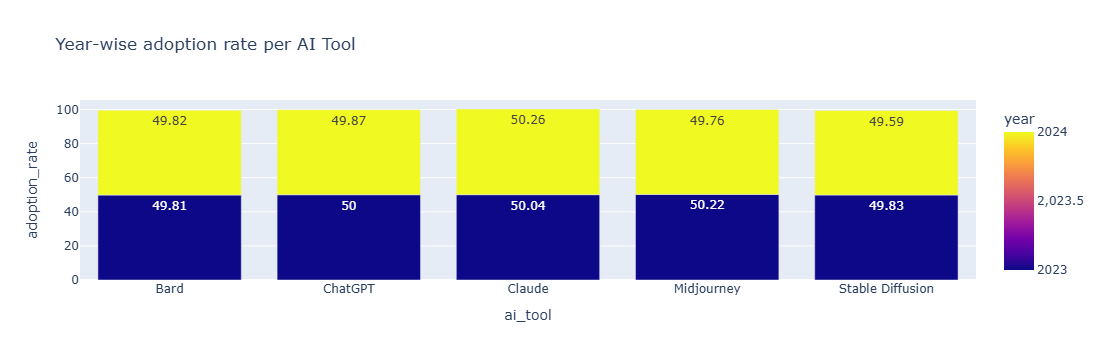

In [88]:
import plotly.express as px

ai = df.groupby(['ai_tool', 'year'])['adoption_rate'].mean().reset_index()
ai
fig = px.bar(ai, x = 'ai_tool', y = 'adoption_rate', color = 'year', title = 'Year-wise adoption rate per AI Tool', \
             text = ai['adoption_rate'].round(2))

fig.update_traces(textposition='inside')

fig.show()

### 9.What are the top 5 countries with the fastest AI adoption growth? 

In [100]:
# Calculate average adoption rate by country and year
country = df.groupby(['country', 'year'])['adoption_rate'].sum().unstack()
country

year,2023,2024
country,,
Australia,216636.08,519381.74
Brazil,211235.50,507627.88
Canada,210422.64,506170.75
China,210910.23,511726.66
France,220393.73,510261.55
Germany,223122.37,499708.48
India,215089.83,512320.52
South Korea,217774.15,507588.48
UK,216388.47,504361.46


In [101]:
# Calculate the % change from 2023 to 2024

country_growth = ((country[2024] - country[2023]) /country[2023]) * 100
country_growth

country
Australia      139.748494
Brazil         140.313716
Canada         140.549567
China          142.627709
France         131.522716
Germany        123.961622
India          138.189095
South Korea    133.080226
UK             133.081485
USA            136.114830
dtype: float64

In [102]:
country['growth'] = country_growth
print('the top 5 countries with the fastest AI adoption growth\n')
country.sort_values('growth', ascending = False).head(5)

the top 5 countries with the fastest AI adoption growth



year,2023,2024,growth
country,,,
China,210910.23,511726.66,142.627709
Canada,210422.64,506170.75,140.549567
Brazil,211235.50,507627.88,140.313716
Australia,216636.08,519381.74,139.748494
India,215089.83,512320.52,138.189095


In [108]:
top5 = country.sort_values('growth', ascending=False).head(5).reset_index()
top5

year,country,2023,2024,growth
0,China,210910.23,511726.66,142.627709
1,Canada,210422.64,506170.75,140.549567
2,Brazil,211235.50,507627.88,140.313716
3,Australia,216636.08,519381.74,139.748494
4,India,215089.83,512320.52,138.189095


In [114]:
print(top5.columns.tolist())

['country', 2023, 2024, 'growth']


In [121]:
top5.dtypes

year
country     object
2023       float64
2024       float64
growth     float64
dtype: object

## Q9 - Visual

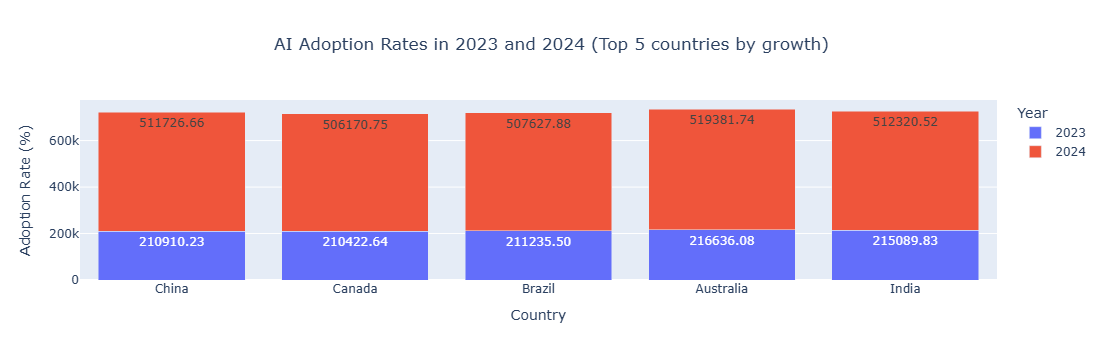

In [130]:
import pandas as pd
import plotly.express as px

top5 = country.sort_values('growth', ascending=False).head(5).reset_index()
top5.rename(columns={'index': 'country'}, inplace=True)

top5.columns = top5.columns.map(str)

long_df = top5.melt(id_vars=['country', 'growth'], value_vars=['2023', '2024'],
                    var_name='Year', value_name='Adoption Rate')

fig = px.bar(long_df, x='country', y='Adoption Rate', color='Year', title='AI Adoption Rates in 2023 and 2024 (Top 5 countries by growth)',\
    labels={'Adoption Rate': 'Adoption Rate (%)', 'country': 'Country'}, hover_data=['growth'], barmode='stack', text='Adoption Rate')

fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')
fig.update_layout(title_x=0.5, yaxis_title='Adoption Rate (%)')

fig.show()


### 10.What is the average AI adoption rate by company size (Startup, SME, Enterprise)?

In [164]:
rate = df.groupby('company_size')['adoption_rate'].mean().round(2).sort_values(ascending = False)
print('the average AI adoption rate by company size (Startup, SME, Enterprise\n\n', rate)

the average AI adoption rate by company size (Startup, SME, Enterprise

 company_size
Startup       50.04
Enterprise    49.84
SME           49.74
Name: adoption_rate, dtype: float64


In [136]:
rate = df.groupby('company_size')['adoption_rate'].mean().round(2).reset_index()
com_rate = rate.sort_values('adoption_rate', ascending = False)
com_rate

,company_size,adoption_rate
2,Startup,50.04
0,Enterprise,49.84
1,SME,49.74


## Q10 - Visual

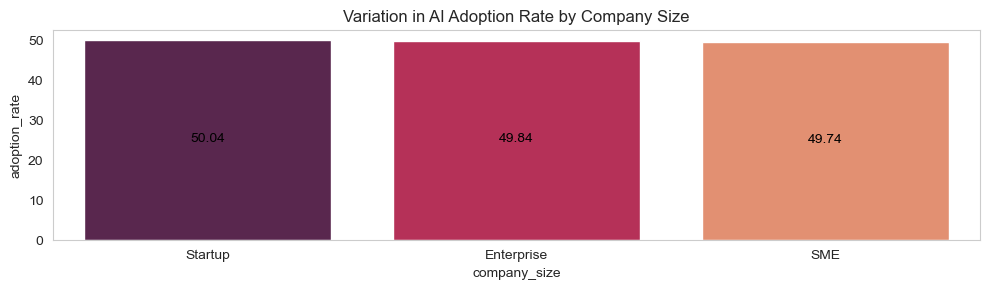

In [264]:

size_rate = pd.DataFrame(com_rate)

plt.figure(figsize = (10,3))

g = sb.barplot(data = size_rate, x = 'company_size', y = 'adoption_rate', hue = 'company_size', palette = 'rocket')

for values in g.containers:
    g.bar_label(values, fmt = '%.2f', label_type = 'center', color = 'black', padding = 1)

plt.title('Variation in AI Adoption Rate by Company Size')
plt.xticks(rotation = 0)
plt.tight_layout()

# Saving this visual plot before showing it
# plt.grid(False)
# plt.savefig("Q10", dpi=300, bbox_inches='tight')

plt.show()

### 11.Which age group shows the highest AI tool usage?

In [162]:
age_usage = df.groupby('age_group')['daily_active_users'].sum().sort_values(ascending = False)
age_usage

age_group
55+      149248059
25-34    146350192
18-24    145263020
35-44    145071470
45-54    144766148
Name: daily_active_users, dtype: int64

In [163]:
top_usage_age = age_usage.max()
usage = age_usage.idxmax()
print('The age group with the highest AI tool usage is: ',usage, top_usage_age )

The age group with the highest AI tool usage is:  55+ 149248059


In [166]:
age_usag = age_usage.reset_index()
age_usag

,age_group,daily_active_users
0,55+,149248059
1,25-34,146350192
2,18-24,145263020
3,35-44,145071470
4,45-54,144766148


## Q11 - Visual

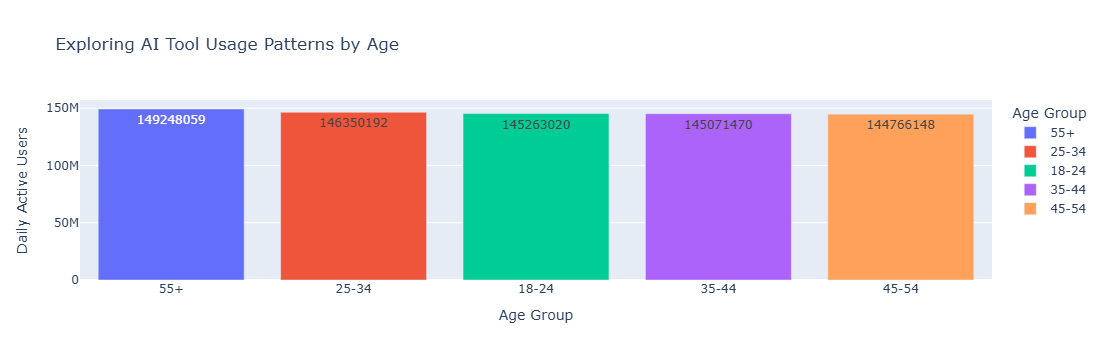

In [171]:
import plotly.express as px

age_user = pd.DataFrame(age_usag)

fig = px.bar(age_user, x = 'age_group', y = 'daily_active_users', title = 'Exploring AI Tool Usage Patterns by Age', color = 'age_group', \
            text = age_user['daily_active_users'].round(2),  labels={'daily_active_users': 'Daily Active Users', 'age_group': 'Age Group'})

fig.update_traces(textposition='inside')
fig.show()

### 12.What is the distribution of company sizes using AI tools?

In [180]:
df['company_size'].value_counts()

company_size
Startup       48601
Enterprise    48279
SME           48120
Name: count, dtype: int64

In [181]:
company_distribution_percent = df['company_size'].value_counts(normalize=True) * 100
company_distribution_percent

company_size
Startup       33.517931
Enterprise    33.295862
SME           33.186207
Name: proportion, dtype: float64

In [182]:
print(company_distribution_percent.round(2).astype(str) + "%")

company_size
Startup       33.52%
Enterprise     33.3%
SME           33.19%
Name: proportion, dtype: object


## Q12 - Visual

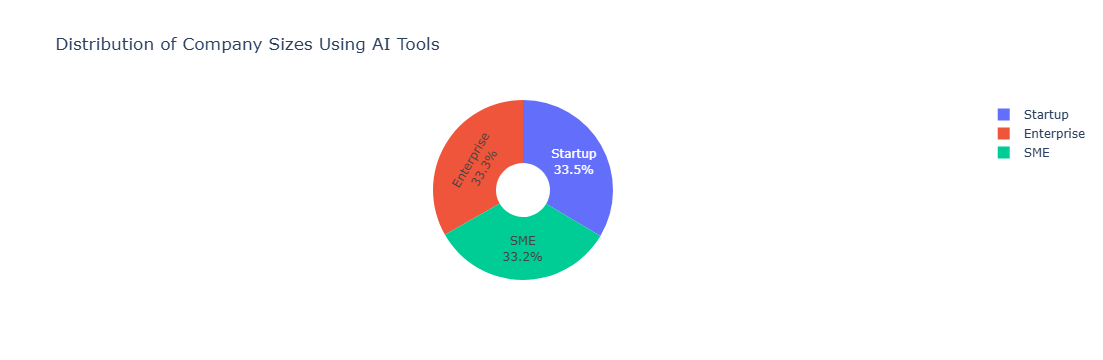

In [181]:
import plotly.express as px

company_dis = df['company_size'].value_counts().reset_index()  # If reset_index is there no need of use pd.DataFrame
company_dis.columns = ['company_size', 'count']

fig = px.pie(company_dist, names = 'company_size', values = 'count', title = 'Distribution of Company Sizes Using AI Tools', hole = 0.3)

fig.update_traces(textinfo='percent+label')
fig.update_traces(textposition = 'inside')
fig.show()

### 13.Which AI tools are growing in adoption over the years?

In [184]:
# Group by ai_tool and year, calculate average adoption rate
year = df.groupby(['ai_tool', 'year'])['adoption_rate'].mean().round(2).unstack()
year

year,2023,2024
ai_tool,,
Bard,49.81,49.82
ChatGPT,50.00,49.87
Claude,50.04,50.26
Midjourney,50.22,49.76
Stable Diffusion,49.83,49.59


In [185]:
# Calculate growth from 2023 to 2024
growth = (((year[2024] - year[2023]) / year[2023] ) * 100) .round(2) 
growth

ai_tool
Bard                0.02
ChatGPT            -0.26
Claude              0.44
Midjourney         -0.92
Stable Diffusion   -0.48
dtype: float64

In [187]:
year['growth'] = growth
adop_ai = year.sort_values('growth', ascending = False).reset_index()
adop_ai

year,ai_tool,2023,2024,growth
0,Claude,50.04,50.26,0.44
1,Bard,49.81,49.82,0.02
2,ChatGPT,50.00,49.87,-0.26
3,Stable Diffusion,49.83,49.59,-0.48
4,Midjourney,50.22,49.76,-0.92


## Q13 - Visual

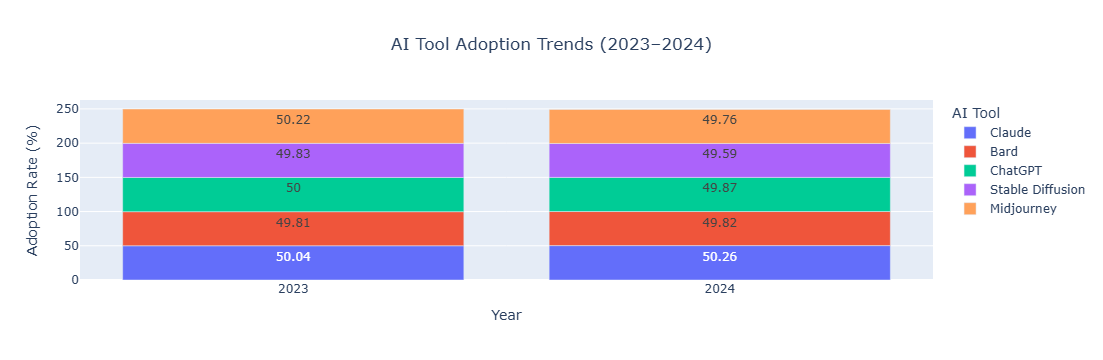

In [209]:
import pandas as pd
import plotly.express as px

# Assuming 'adop_ai' has columns: ['ai_tool', '2023', '2024', 'growth']
# Convert year columns to strings
adop_ai.columns = adop_ai.columns.map(str)

# Melt to long format
long_df = adop_ai.melt(id_vars='ai_tool', value_vars=['2023', '2024'],
                       var_name='year', value_name='adoption_rate')

# Map growth from adop_ai to long_df by ai_tool
growth_map = adop_ai.set_index('ai_tool')['growth']
long_df['growth'] = long_df['ai_tool'].map(growth_map).round(2)

# Plot
fig = px.bar(long_df, x='year', y='adoption_rate', color='ai_tool',
             title='AI Tool Adoption Trends (2023–2024)',
             labels={'adoption_rate': 'Adoption Rate (%)', 'year': 'Year', 'ai_tool': 'AI Tool'},
             text=long_df['adoption_rate'].round(2),  # Show rounded values on bars
             hover_data={'growth': True})  # keep hover info if you want

fig.update_traces(textposition='inside')  # you can also use 'inside' or 'auto'
fig.update_layout(title_x=0.5)
fig.show()


### 14.Which country or region is lagging in AI adoption?

In [211]:
country_adption = df.groupby('country')['adoption_rate'].mean().round(2).sort_values()
country_adption 

country
USA            49.50
China          49.62
France         49.79
UK             49.79
South Korea    49.89
Canada         49.92
Australia      49.99
Brazil         49.99
India          50.06
Germany        50.18
Name: adoption_rate, dtype: float64

In [212]:
country_name = country_adption.idxmin()
country_adoptionrate = country_adption.min()
print('country is lagging in AI adoption: ', country_name, country_adoptionrate )

country is lagging in AI adoption:  USA 49.5


In [213]:
country_adption = df.groupby('country')['adoption_rate'].mean().round(2).reset_index()
country_adption 

,country,adoption_rate
0,Australia,49.99
1,Brazil,49.99
2,Canada,49.92
3,China,49.62
4,France,49.79
5,Germany,50.18
6,India,50.06
7,South Korea,49.89
8,UK,49.79
9,USA,49.50


## Q14 - Visual

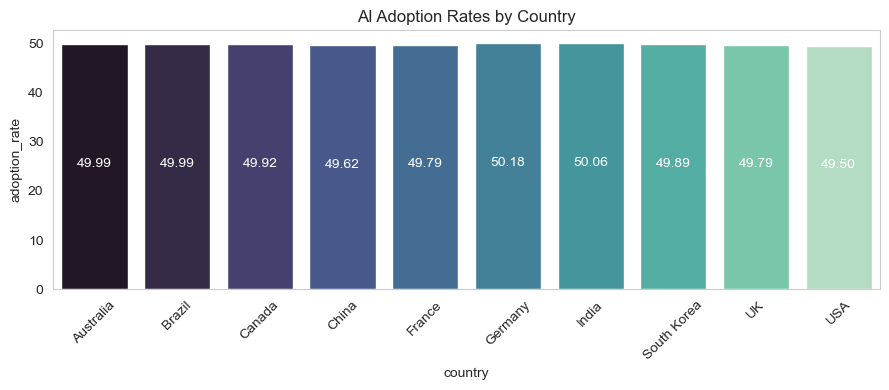

In [265]:

country_adption 

plt.figure(figsize = (9,4))
h = sb.barplot(data = country_adption, x = 'country', y = 'adoption_rate', hue = 'country', palette = 'mako')

for values in h.containers:
    h.bar_label(values, fmt = '%.2f', label_type = 'center', color = 'white', padding = 2)

plt.title('AI Adoption Rates by Country')
plt.xticks(rotation = 45)
plt.tight_layout()


# Saving this visual plot before showing it
# plt.grid(False)
# plt.savefig("Q14", dpi=300, bbox_inches='tight')

plt.show()

### 15.How does AI adoption differ between SMEs and Enterprises?

In [224]:
company = df.groupby('company_size')['adoption_rate'].mean()
company

company_size
Enterprise    49.836855
SME           49.743258
Startup       50.037439
Name: adoption_rate, dtype: float64

In [225]:
# Compare Average Adoption Rate
avg_adoption = df[df['company_size'].isin(['SME','Enterprise' ])].groupby('company_size')['adoption_rate'].mean()
avg_adoption

company_size
Enterprise    49.836855
SME           49.743258
Name: adoption_rate, dtype: float64

In [226]:
# Compare Total Daily Active Users
active_users = df[df['company_size'].isin(['SME','Enterprise' ])].groupby('company_size')['daily_active_users'].sum()
active_users

company_size
Enterprise    242441817
SME           242547002
Name: daily_active_users, dtype: int64

In [227]:
# Compare Adoption Over Time (2023 vs 2024)
time = df[df['company_size'].isin(['SME','Enterprise' ])]. \
        groupby(['company_size', 'year'])['adoption_rate'].mean().round(2).unstack()
time

year,2023,2024
company_size,,
Enterprise,49.89,49.81
SME,49.92,49.67


In [241]:
dif = time.reset_index()
dif

year,company_size,2023,2024
0,Enterprise,49.89,49.81
1,SME,49.92,49.67


## Q15 - Visual

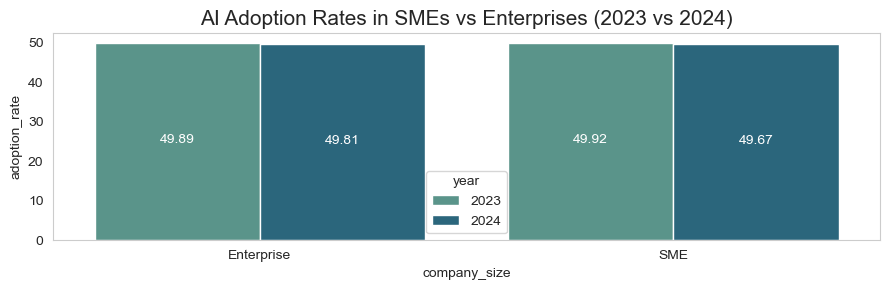

In [266]:

plt.figure(figsize = (9,3))

dif.columns = dif.columns.map(str)

di = dif.melt(id_vars='company_size', value_vars=['2023', '2024'],
                      var_name='year', value_name='adoption_rate')

i = sb.barplot(data=di, x='company_size', y='adoption_rate', hue='year', palette='crest')

for values in i.containers:
    i.bar_label(values, fmt='%.2f', label_type='center', color='white', padding=1)

plt.title('AI Adoption Rates in SMEs vs Enterprises (2023 vs 2024)', fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()


# Saving this visual plot before showing it
# plt.grid(False)
# plt.savefig("Q15", dpi=300, bbox_inches='tight')

plt.show()
